## Unveiling Insights: Exploring Stack Overflow's 2017 Survey - Spotlight on Turkey

### Question 1: What's the Global Salary Landscape and Turkey's Position on the Global Stage?

In [143]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
import seaborn as sns
import geopandas as gpd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline

# Read the main survey data into a DataFrame
df = pd.read_csv('datasets/survey_results_public.csv')

# Read the schema data that describes the columns in the survey data
schema = pd.read_csv('datasets/survey_results_schema.csv')

# Read the country-to-continent matching data
match = pd.read_csv('datasets/country_cont_match.csv')

In [144]:
print("Number of Column {}, Number of Row: {} in survey dataframe.".format(df.shape[1],df.shape[0]))

Number of Column 154, Number of Row: 51392 in survey dataframe.


There are lots of rows. That's why I have decided to analyze with a smaller dataset with less column.

In [145]:
# Subsetting relevant columns from the DataFrame
# Selecting columns: 'Salary', 'Country', 'Gender', and 'EmploymentStatus'
num_vars = df[['Salary', 'Country', 'Gender', 'EmploymentStatus']]

# Display the first few rows of the subsetted DataFrame
print("Subsetted Data Preview:\n {}".format(num_vars.head()))

# Display summary statistics for the subsetted DataFrame
print("\nSummary Statistics: \n{}".format(num_vars.describe()))


Subsetted Data Preview:
      Salary         Country Gender                        EmploymentStatus
0       NaN   United States   Male  Not employed, and not looking for work
1       NaN  United Kingdom   Male                      Employed part-time
2  113750.0  United Kingdom   Male                      Employed full-time
3       NaN   United States   Male                      Employed full-time
4       NaN     Switzerland    NaN                      Employed full-time

Summary Statistics: 
              Salary
count   12891.000000
mean    56298.480641
std     39880.905277
min         0.000000
25%     26440.371839
50%     50000.000000
75%     80000.000000
max    197000.000000


In [146]:
#Number of Different Answers for Each Category
for column in num_vars.columns:
    print("Number of options in {} is {}".format(column, num_vars[column].nunique()))

Number of options in Salary is 3049
Number of options in Country is 201
Number of options in Gender is 29
Number of options in EmploymentStatus is 7


Lets look at the contributers' nationalities.

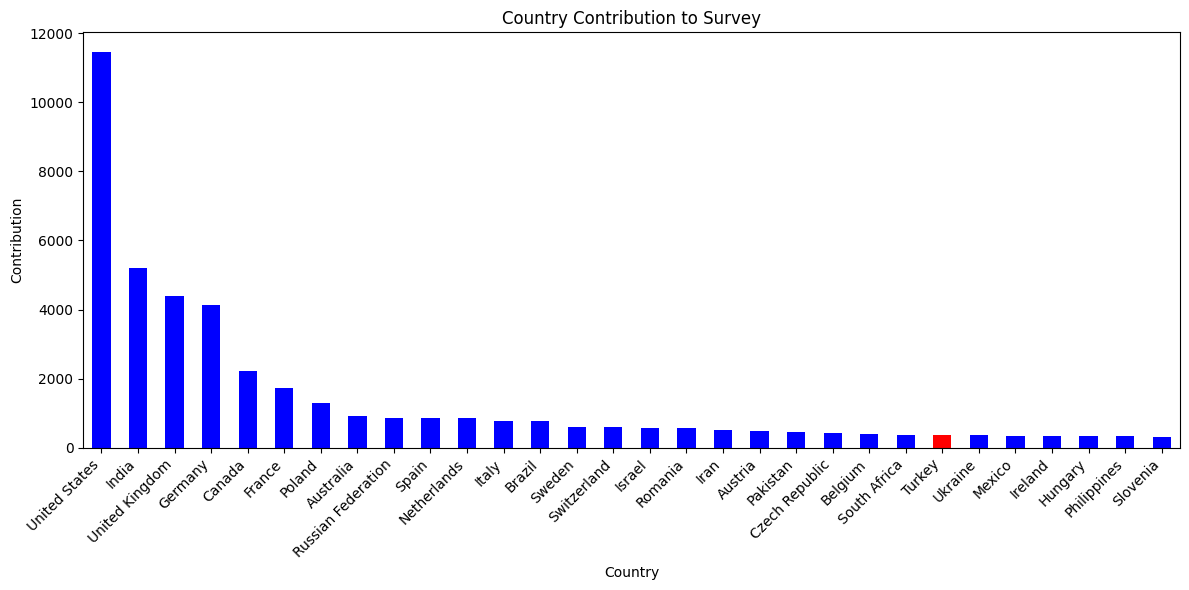

In [147]:
# Calculate average salary by country
country_counts = num_vars['Country'].value_counts().head(30)

#Highlight Turkey within data
default_color = 'blue'
highlight_color = 'red'
colors = [highlight_color if i == 23 else default_color for i in range(len(country_counts))]

# Create a bar plot using Matplotlib
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color=colors)
plt.xlabel('Country')
plt.ylabel('Contribution')
plt.title('Country Contribution to Survey')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

Turkey is the 24th most contributing country. We see that United States, India, United Kingdom, Germany and Canada are on the lead.

I want to investigate lots of things. But first things first. Let's look at the salaries. Which coders gain more in which countries?

/tmp/ipykernel_1072/3934878841.py:7: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


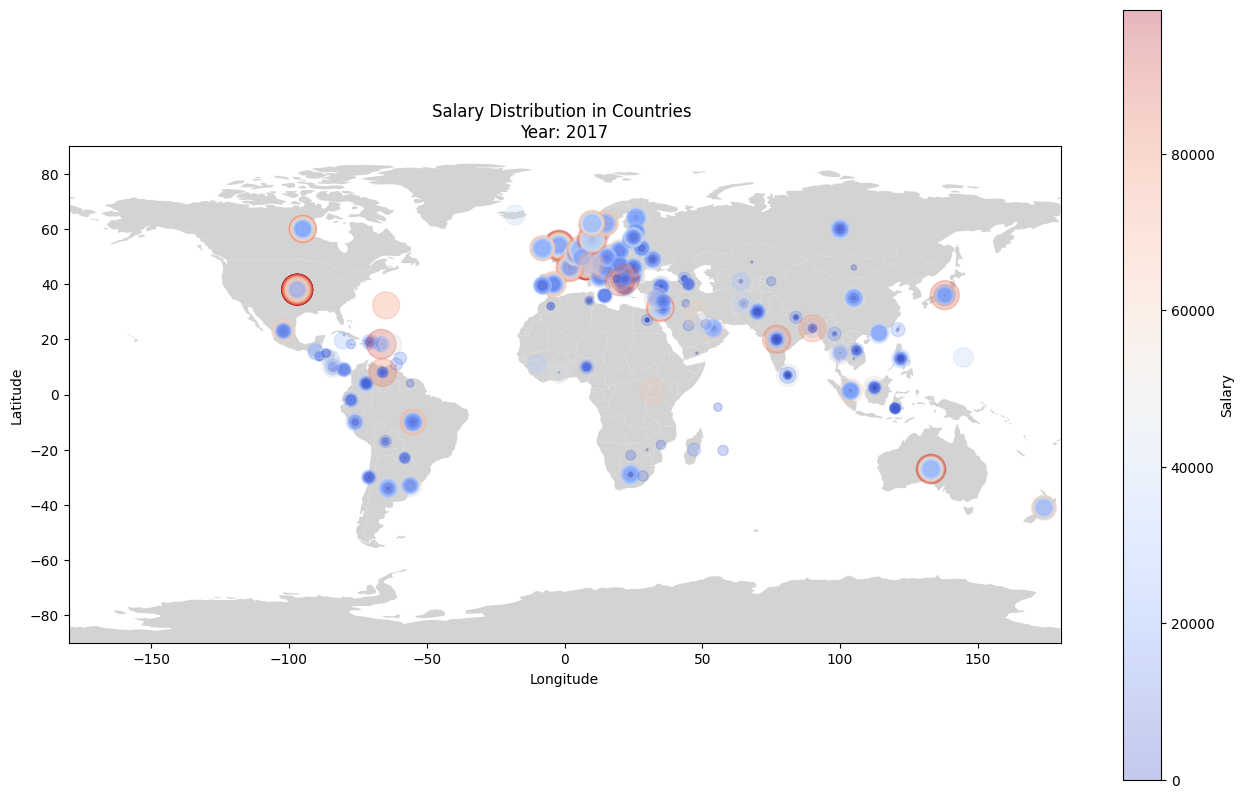

In [148]:
# Import necessary libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the world map geometries using GeoPandas
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Merge the main data with the country-to-continent matching data based on the 'Country' column
merged_df = pd.merge(num_vars, match, on='Country')

# Creating axes and plotting the world map
fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color="lightgrey", ax=ax)  # Plotting the base world map

# Plotting data points
x = merged_df['Longitude']
y = merged_df['Latitude']
z = merged_df['Salary']
plt.scatter(x, y, 
            s=0.0025*z,         # Size of points based on salary
            c=0.5*z,            # Color of points based on salary
            alpha=0.3,          # Transparency of points
            cmap='coolwarm'     # Colormap for coloring points
           )
plt.colorbar(label='Salary')  # Adding a colorbar to show salary scale

# Setting axis limits and adding title
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.title("Salary Distribution in Countries \nYear: 2017")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Display the plot
plt.show()

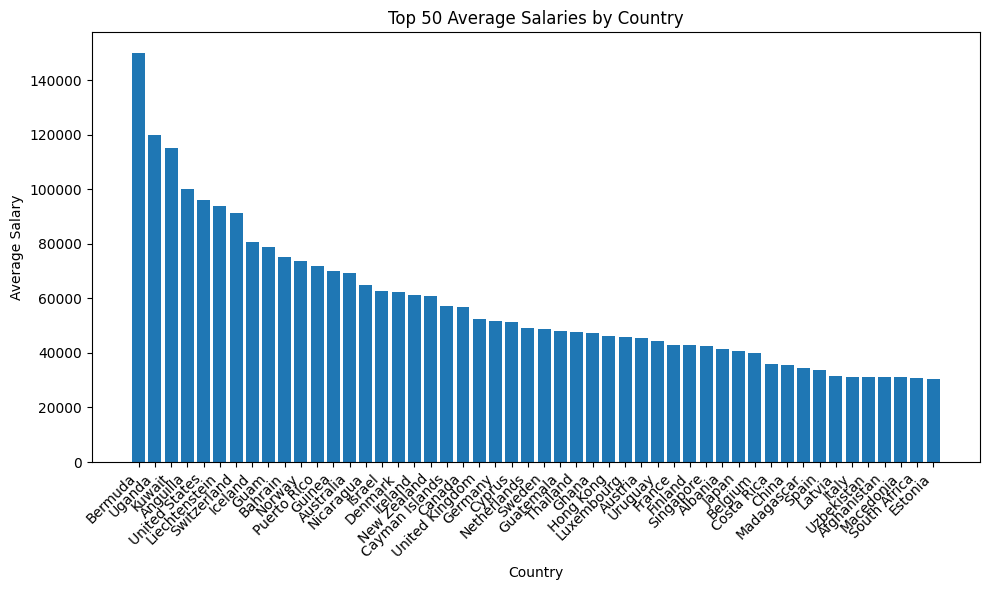

In [149]:
mean_salary_by_country = merged_df.groupby('Country')['Salary'].mean().reset_index()
# Sort countries by average salary and select the top 50

sorted_top_countries = mean_salary_by_country.sort_values(by='Salary', ascending=False).head(50)

# Create a bar plot to visualize top 50 average salaries by country
plt.figure(figsize=(10, 6))
plt.bar(sorted_top_countries['Country'], sorted_top_countries['Salary'])
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.title('Top 50 Average Salaries by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

It is again showed that ignoring some small countries, United States is on the lead. **But where is the Turkey?**. It was on top 30 in the contribution. **Seems strange!**

Let's look at the European zone to get a better insight.

In [150]:
#By the way, the average of Turkey's Salary is :
num_vars[num_vars['Country'] == "Turkey"]['Salary'].mean()

18412.46941243999

/tmp/ipykernel_1072/2266548132.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


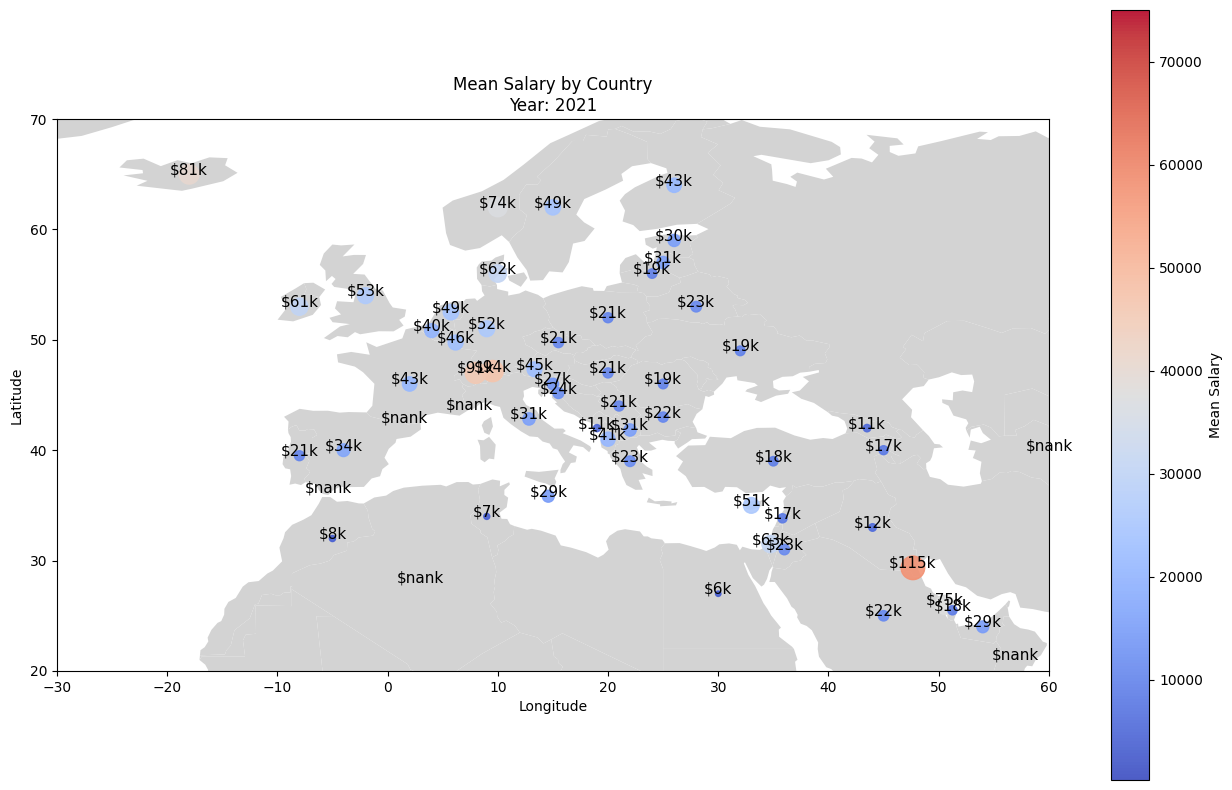

In [151]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the world map geometries using GeoPandas
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Merge the main data with the country-to-continent matching data based on the 'Country' column
merged_df = pd.merge(num_vars, match, on='Country')

# Calculate mean salary by country
mean_salary_by_country = merged_df.groupby('Country')['Salary'].mean().reset_index()
mean_salary_by_country = pd.merge(mean_salary_by_country, match, on='Country')

# Creating axes and plotting the world map
fig, ax = plt.subplots(figsize=(16, 10))
worldmap.plot(color="lightgrey", ax=ax)  # Plotting the base world map

# Plotting data points
x = mean_salary_by_country['Longitude']
y = mean_salary_by_country['Latitude']
z = mean_salary_by_country['Salary']
scatter = plt.scatter(x, y, 
            s=0.0025*z,         # Size of points based on mean salary
            c=0.5*z,            # Color of points based on mean salary
            alpha=0.9,          # Transparency of points
            cmap='coolwarm'     # Colormap for coloring points
           )
plt.colorbar(label='Mean Salary')  # Adding a colorbar to show mean salary scale

# Annotate data points with mean salary values
for i, txt in enumerate(z):
    plt.annotate(f"${txt/1000:,.0f}k", (x[i], y[i]), fontsize=11, color='black', ha='center', va='baseline')

# Setting axis limits and adding title
plt.xlim([-30, 60])
plt.ylim([20, 70])
plt.title("Mean Salary by Country\nYear: 2021")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Display the plot
plt.show()


This is probably due to currency issues of Turkey. We can see that they are quiet underpaid. What about the top and bottom countries?

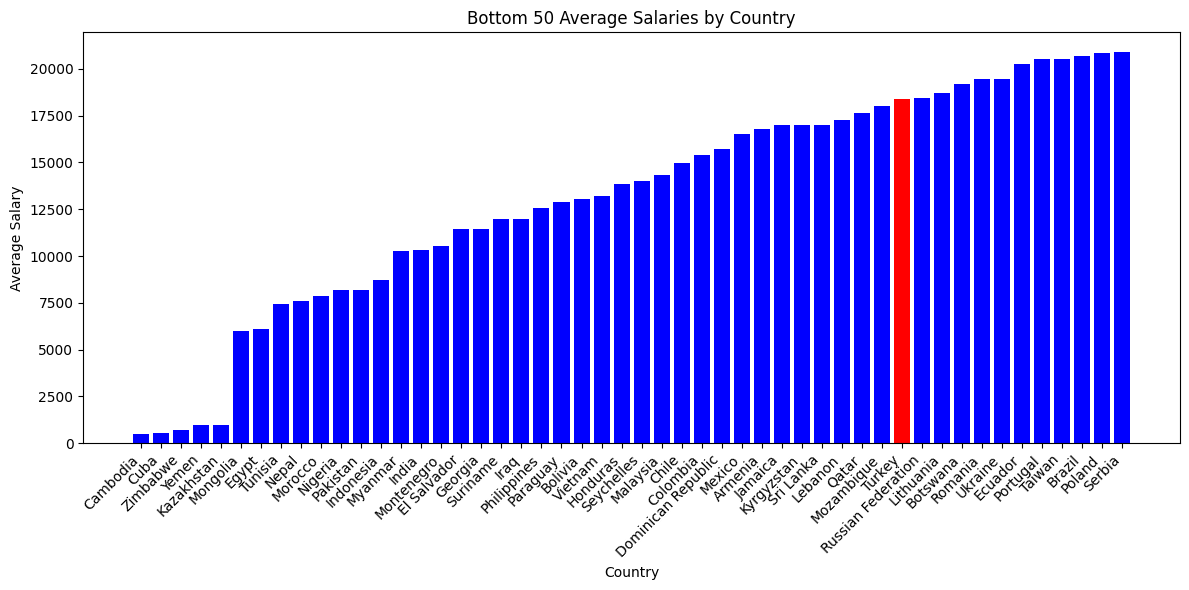

In [152]:
country_counts = num_vars['Country'].value_counts().head(50)
# Sort countries by average salary and select the top 50
sorted_bottom_countries = mean_salary_by_country.sort_values(by='Salary', ascending=True).head(len(country_counts))

#Highlight Turkey within data
default_color = 'blue'
highlight_color = 'red'
colors = [highlight_color if i == 38 else default_color for i in range(len(country_counts))]

# Create a bar plot to visualize top 50 average salaries by country
plt.figure(figsize=(12, 6))
plt.bar(sorted_bottom_countries['Country'], sorted_bottom_countries['Salary'], color=colors)
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.title('Bottom 50 Average Salaries by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

### Question 2: Are There Relationships Between Gender Distribution, Work Arrangements, and Salary Patterns Among Developers in  Turkey? 

It is sad Turkey has lots of coders but paid that less. Let's now breakdown in to different categories. It is time to look at the gender distribution.

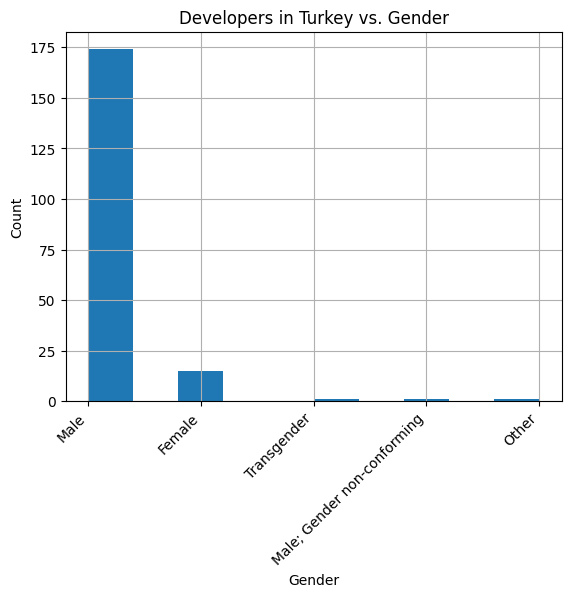

In [153]:
# Drop the rows with missing salaries
gender_tur = num_vars[num_vars['Country']=="Turkey"]
# See Distribution
gender_tur['Gender'].hist()
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Developers in Turkey vs. Gender')
plt.show()


Things are getting worse. Certainly, there is something should be improved at least women contributors should be higher.

In [154]:
gender_tur.shape

(363, 4)

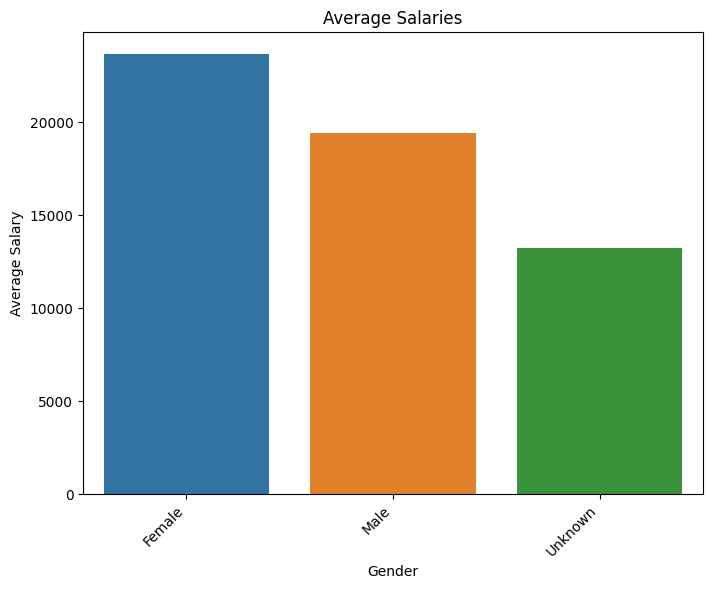

In [155]:
terms_to_replace = ['Other', 'Gender non-conforming',
                    'non-conforming', 'Transgender']
replacement_terms = ['Other', 'Gender non-conforming',
                     'non-conforming', 'Transgender']

# Reduce Gender Column to analyze better


def replace_terms(text):
    if isinstance(text, str):
        for i, term in enumerate(terms_to_replace):
            if term in text:
                return replacement_terms[i]
                break
    return text


df_visualization = gender_tur.copy()
# Apply the replacement function to the Gender column
df_visualization['Gender'] = df_visualization['Gender'].apply(replace_terms)


# Cinsiyet sütunundaki NaN değerleri dolduralım
df_visualization['Gender'].fillna('Unknown', inplace=True)

# Kırılıma göre ortalama maaşları hesaplayalım
average_salary_by_gender = df_visualization.dropna().groupby('Gender')['Salary'].mean().reset_index()

# Bar plot'u çizdirelim
plt.figure(figsize=(8, 6))
sns.barplot(data=average_salary_by_gender, x='Gender', y='Salary')
plt.title('Average Salaries')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()


Do we know anything about employment status?

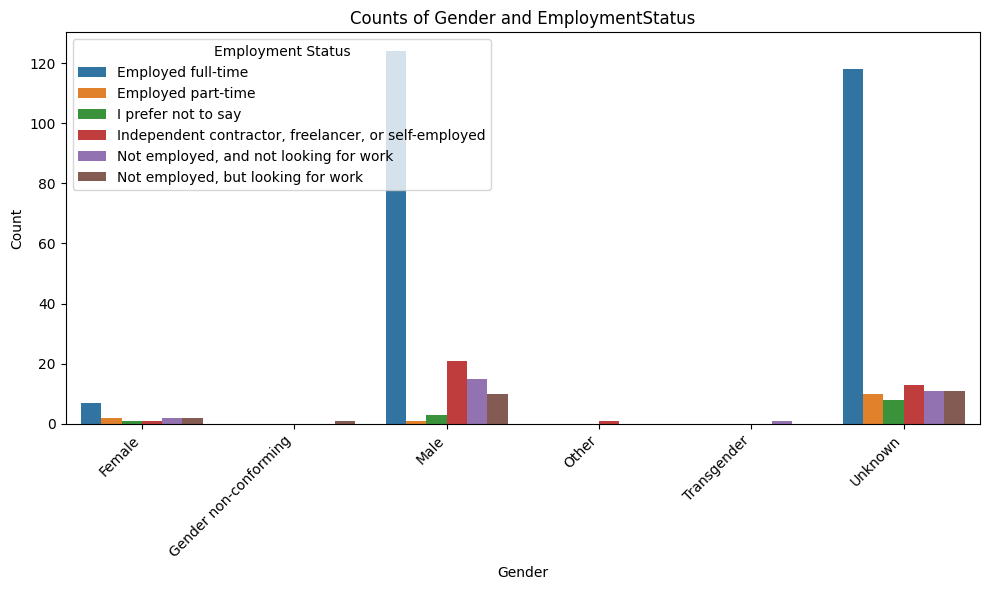

In [156]:
grouped_data = df_visualization.groupby(['Gender', 'EmploymentStatus']).size().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Gender', y='Count', hue='EmploymentStatus')
plt.title('Counts of Gender and EmploymentStatus')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment Status')
plt.tight_layout()
plt.show()

### Question 3: How Effective Mindsets on Job Satisfaction? Are There Mindset Patterns of Successful Individuals in Turkey?

In an effort to understand the key drivers of Job Satisfaction in the country, we delve into the Stack Overflow 2017 Survey data. By examining the survey responses, we aim to uncover any prevalent mindset traits that might contribute to the achievements and job satisfaction of individuals in various fields. Through this exploration, we seek to shed light on the measured factors in survey that play a role in fostering success within the Turkish context.

First, by conducting a search within Stack Overflow Schema CSV file, I identified questions that could reveal individuals' mindsets. Then, I created an additional dataframe by listing the columns that I believed reflected personality traits. In this way, I ended up with a dataset comprising multiple inputs and an output (JobSatisfaction).

In [161]:
Output_name = 'JobSatisfaction'
df_satifsaction = df[df['Country'] == "Turkey"]
df_satifsaction2 = df_satifsaction[df_satifsaction['EmploymentStatus'] == "Employed full-time"]
work_env = df_satifsaction2[['HoursPerWeek','ChangeWorld','ChallengeMyself', 'ProblemSolving', 'Overpaid','SeriousWork','CompetePeers','LearningNewTech', Output_name]]

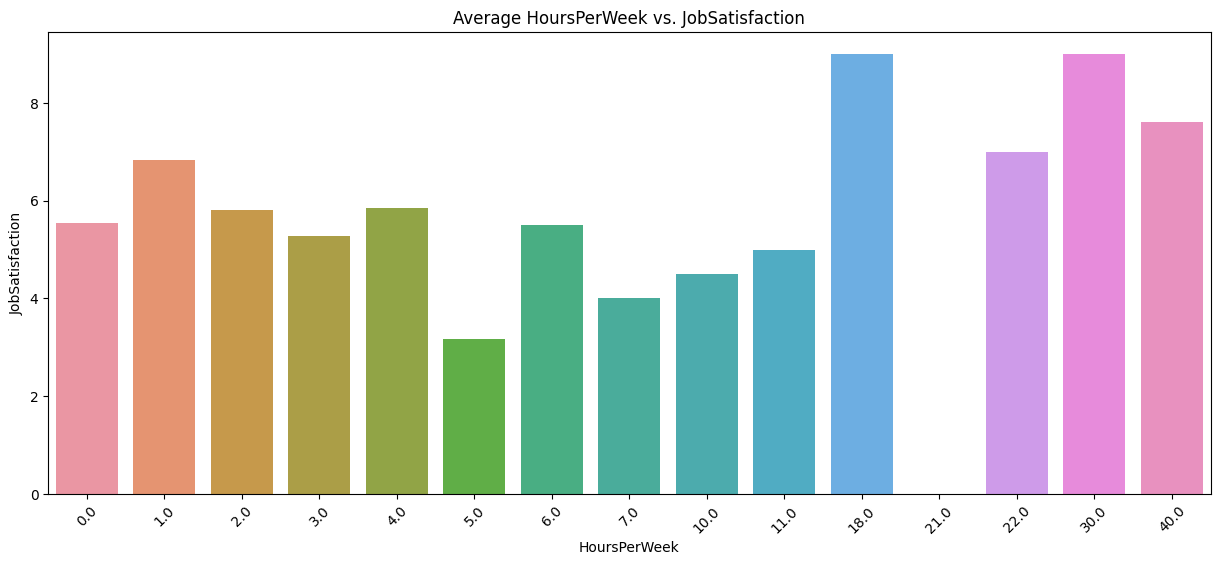

In [162]:
average_salaries = work_env.groupby('HoursPerWeek')['JobSatisfaction'].mean().reset_index()
# Seaborn kullanarak çubuk grafiği çizdir
plt.figure(figsize=(15, 6))
sns.barplot(x='HoursPerWeek', y='JobSatisfaction', data=average_salaries)
plt.xlabel('HoursPerWeek')
plt.ylabel('JobSatisfaction')

plt.title('Average ' + str('HoursPerWeek') + ' vs. ' + str('JobSatisfaction'))
plt.xticks(rotation=45)  # Eğik olarak kategori isimlerini göster
plt.show()

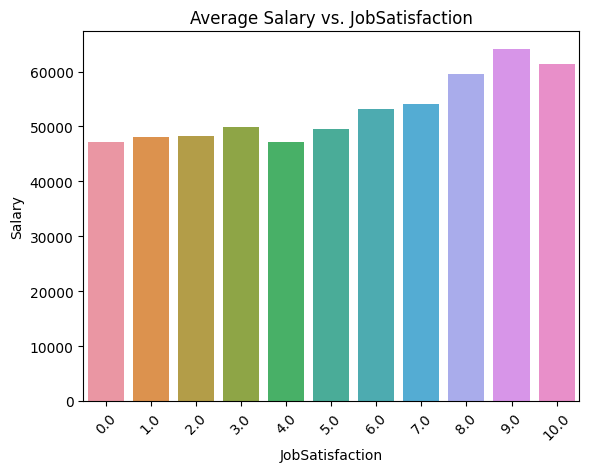

In [159]:
average_salaries = df.groupby('JobSatisfaction')['Salary'].mean().reset_index()
# Seaborn kullanarak çubuk grafiği çizdir
sns.barplot(x='JobSatisfaction', y='Salary', data=average_salaries)
plt.xlabel('JobSatisfaction')
plt.ylabel('Salary')
plt.title('Average ' + str('Salary') + ' vs. ' + str('JobSatisfaction'))
plt.xticks(rotation=45)  # Eğik olarak kategori isimlerini göster
plt.show()